### Big Mart Sales Prediction

- [Big Mart Sales Prediction](https://datahack.analyticsvidhya.com/contest/big-mart-sales-prediction/#ProblemStatement)

In [140]:
import tensorflow as tf
from tensorflow.keras.layers import ReLU, Dense, Input
from tensorflow.keras.models import Model

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

### Read Data

In [142]:
folder_path = 'C:/Users/Home/Desktop/05_Fundamentals_of_deep_learning/'

train_data_path = folder_path + 'train.csv'
test_data_path = folder_path + 'test.csv'

In [196]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [144]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
print(f'Train data shape : {train_data.shape}')
print(f'Test data shape : {test_data.shape}')

Train data shape : (8523, 12)
Test data shape : (5681, 11)


In [146]:
# list all columns in train data
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [147]:
# check for missing values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [148]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Data Preprocessing

### Filling Missing Values

In [149]:
print(f"Mean of Item Weight : {train_data['Item_Weight'].mean()}")
print(f"Median of Item Weight : {train_data['Item_Weight'].median()}")

Mean of Item Weight : 12.857645184135976
Median of Item Weight : 12.6


#### Continuous Values - Mean/Median

In [150]:
# Replace Nan values by mean/median for continuous variables
# train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

# f[col] = df[col].method(value)
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [151]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [152]:
# df.method({col: value}, inplace=True)
test_data.fillna({'Item_Weight' : test_data['Item_Weight'].mean()}, inplace=True)

In [153]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Categorical Values - Mode

In [154]:
# Replace Nan values by mode for categorical variables
# train_data.fillna({'Outlet_Size' : train_data['Outlet_Size'].mode()}, inplace=True)
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [155]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [156]:
test_data.fillna({'Outlet_Size' : test_data['Outlet_Size'].mode()[0]}, inplace=True)

In [157]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Converting Categorical Values to Numerical

In [158]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Item_Fat_Content    

In [159]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0,'reg':1})

In [160]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [161]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0,'reg':1})

In [162]:
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    3668
1    2013
Name: count, dtype: int64

In [163]:
train_data['Item_Type'] = train_data['Item_Type'].map({
    'Dairy':0, 'Soft Drinks':1, 'Meat':2, 'Fruits and Vegetables':3,
    'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
    'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
    'Breads':12, 'Starchy Foods':13, 'Seafood':14, 'Others':15})

In [164]:
test_data['Item_Type'] = test_data['Item_Type'].map({
    'Dairy':0, 'Soft Drinks':1, 'Meat':2, 'Fruits and Vegetables':3,
    'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
    'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
    'Breads':12, 'Starchy Foods':13, 'Seafood':14, 'Others':15})

#### Outlet_Size

In [165]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

In [166]:
test_data['Outlet_Size'] = test_data['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

#### Outlet_Location_Type    

In [167]:
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

In [168]:
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

#### Outlet_Type       

In [169]:
train_data['Outlet_Type'] = train_data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 
                                                           'Grocery Store':4, 'Supermarket Type3':3})

In [170]:
test_data['Outlet_Type'] = test_data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 
                                                           'Grocery Store':4, 'Supermarket Type3':3})

In [171]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [172]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [173]:
train_data_1 = train_data

In [174]:
train_data.drop(['Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [175]:
test_data.drop(['Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [176]:
train_data.dtypes

Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_Type                 int64
Item_MRP                float64
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type               int64
Item_Outlet_Sales       float64
dtype: object

### Bringing all the variables in range 0 to 1

In [110]:
# # applying for loop to bring all the variables in range 0 to 1

# for i in train_data.columns[:-1]:
#     train_data[i] = (train_data[i] - train_data[i].min()) / (train_data[i].max() - train_data[i].min())

In [111]:
# for i in test_data.columns[:-1]:
#     test_data[i] = (test_data[i] - test_data[i].min()) / (test_data[i].max() - test_data[i].min())

In [112]:
# # again looking at first five rows of pre-processed data
# train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.048866,0.000000,0.927507,0.5,0.0,0.000000,3735.1380
1,0.081274,1.0,0.058705,0.066667,0.072068,0.5,1.0,0.333333,443.4228
2,0.770765,0.0,0.051037,0.133333,0.468288,0.5,0.0,0.000000,2097.2700
3,0.871986,1.0,0.000000,0.200000,0.640093,0.5,1.0,1.000000,732.3800
4,0.260494,0.0,0.000000,0.266667,0.095805,1.0,1.0,0.000000,994.7052


### Write preprocessed data to csv

In [113]:
# saving the pre-processed data
train_data.to_csv('big_mart_sales_train_data.csv', index=False)

In [114]:
# saving the pre-processed data
test_data.to_csv('big_mart_sales_test_data.csv', index=False)

### Split Data To X and Y

In [177]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = train_data.drop('Item_Outlet_Sales', axis=1)

# storing the dependent variable as y
y = train_data['Item_Outlet_Sales']

In [178]:
# shape of independent and dependent variables
X.shape, y.shape

((8523, 8), (8523,))

### Train and Val

In [179]:
# Creating training and validation set

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.2)

### Defining the architecture of the model

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense 

In [181]:
# number of input neurons
X_train.shape

(6818, 8)

In [182]:
# number of features in the data
X_train.shape[1]

8

In [183]:
# defining input neurons
input_neurons = X_train.shape[1]

In [184]:
# define number of output neurons
output_neurons = 1

In [185]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 30
neuron_hidden_layer_2 = 20
neuron_hidden_layer_3 = 10


In [186]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [187]:
# summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1111 (4.34 KB)
Trainable params: 1111 (4.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile model

In [188]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [189]:
# rmse = tf.keras.metrics.RootMeanSquaredError()
# model.compile(loss='mean_squared_error',optimizer='Adam',metrics=[rmse,'mae'])

In [190]:
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae','mape'])

### Train Model

In [191]:
model_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150)

Epoch 1/150
214/214 [==============================] - 2s 5ms/step - loss: 4733392.0000 - mae: 1588.7228 - mape: 100.7663 - val_loss: 1930889.1250 - val_mae: 1024.2982 - val_mape: 149.1224
Epoch 2/150
214/214 [==============================] - 1s 4ms/step - loss: 1996341.1250 - mae: 1041.1049 - mape: 150.1602 - val_loss: 1921535.0000 - val_mae: 1027.9578 - val_mape: 154.3257
Epoch 3/150
214/214 [==============================] - 1s 4ms/step - loss: 1991498.8750 - mae: 1040.5150 - mape: 148.4961 - val_loss: 1913631.2500 - val_mae: 1024.6820 - val_mape: 152.3615
Epoch 4/150
214/214 [==============================] - 1s 4ms/step - loss: 1984184.0000 - mae: 1037.5264 - mape: 147.5300 - val_loss: 1910266.6250 - val_mae: 1014.5217 - val_mape: 142.1468
Epoch 5/150
214/214 [==============================] - 1s 5ms/step - loss: 1979000.5000 - mae: 1034.9324 - mape: 145.2815 - val_loss: 1895572.3750 - val_mae: 1014.6719 - val_mape: 144.6156
Epoch 6/150
214/214 [==============================] - 

214/214 [==============================] - 1s 4ms/step - loss: 1593958.0000 - mae: 903.0630 - mape: 81.2222 - val_loss: 1558313.5000 - val_mae: 892.7018 - val_mape: 81.7976
Epoch 45/150
214/214 [==============================] - 1s 4ms/step - loss: 1582524.1250 - mae: 897.9843 - mape: 80.1554 - val_loss: 1546295.8750 - val_mae: 890.6340 - val_mape: 81.6507
Epoch 46/150
214/214 [==============================] - 1s 4ms/step - loss: 1575819.8750 - mae: 897.1036 - mape: 80.6918 - val_loss: 1567474.6250 - val_mae: 877.2816 - val_mape: 73.5498
Epoch 47/150
214/214 [==============================] - 1s 4ms/step - loss: 1553006.7500 - mae: 888.0677 - mape: 78.6699 - val_loss: 1530737.3750 - val_mae: 887.8309 - val_mape: 82.3694
Epoch 48/150
214/214 [==============================] - 1s 4ms/step - loss: 1542608.2500 - mae: 884.2234 - mape: 78.1235 - val_loss: 1508607.3750 - val_mae: 876.5566 - val_mape: 78.6484
Epoch 49/150
214/214 [==============================] - 1s 4ms/step - loss: 1528496

214/214 [==============================] - 1s 4ms/step - loss: 1310403.8750 - mae: 806.5696 - mape: 62.1951 - val_loss: 1318532.6250 - val_mae: 809.9434 - val_mape: 62.6600
Epoch 89/150
214/214 [==============================] - 1s 4ms/step - loss: 1314307.6250 - mae: 808.2610 - mape: 62.7542 - val_loss: 1360433.5000 - val_mae: 839.9793 - val_mape: 72.1663
Epoch 90/150
214/214 [==============================] - 1s 4ms/step - loss: 1308250.7500 - mae: 806.3033 - mape: 61.9647 - val_loss: 1310059.6250 - val_mae: 812.1019 - val_mape: 66.1498
Epoch 91/150
214/214 [==============================] - 1s 4ms/step - loss: 1309229.6250 - mae: 806.1589 - mape: 62.3799 - val_loss: 1313707.8750 - val_mae: 812.4727 - val_mape: 63.4053
Epoch 92/150
214/214 [==============================] - 1s 4ms/step - loss: 1303672.7500 - mae: 804.9466 - mape: 61.5907 - val_loss: 1315904.7500 - val_mae: 802.7456 - val_mape: 59.0965
Epoch 93/150
214/214 [==============================] - 1s 4ms/step - loss: 1297758

Epoch 132/150
214/214 [==============================] - 1s 4ms/step - loss: 1271387.8750 - mae: 797.7219 - mape: 61.4296 - val_loss: 1280209.7500 - val_mae: 801.4390 - val_mape: 65.8478
Epoch 133/150
214/214 [==============================] - 1s 4ms/step - loss: 1272009.2500 - mae: 798.9743 - mape: 61.6019 - val_loss: 1297962.2500 - val_mae: 797.3473 - val_mape: 58.1275
Epoch 134/150
214/214 [==============================] - 1s 4ms/step - loss: 1267456.6250 - mae: 797.0294 - mape: 60.7052 - val_loss: 1282040.7500 - val_mae: 794.9214 - val_mape: 59.9630
Epoch 135/150
214/214 [==============================] - 1s 4ms/step - loss: 1269034.7500 - mae: 796.8900 - mape: 61.4002 - val_loss: 1297166.2500 - val_mae: 800.9142 - val_mape: 61.0346
Epoch 136/150
214/214 [==============================] - 1s 4ms/step - loss: 1279039.3750 - mae: 800.9427 - mape: 61.6241 - val_loss: 1277874.8750 - val_mae: 796.1680 - val_mape: 61.5470
Epoch 137/150
214/214 [==============================] - 1s 4ms/s

### Evaluation

In [192]:
# getting predictions for the validation set
prediction = model.predict(test_data)
print(prediction.max(),prediction.min())
prediction

178/178 [==============================] - 0s 2ms/step
5546.815 139.75238


array([[1761.5061],
       [1365.1819],
       [ 979.039 ],
       ...,
       [1829.6908],
       [3384.603 ],
       [1232.4662]], dtype=float32)

In [193]:
### Visualization

In [194]:
def plots(model_history):
  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(model_history.history['mape'])
  plt.plot(model_history.history['val_mape'])
  plt.title('model mape')
  plt.ylabel('mape')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(model_history.history['mae'])
  plt.plot(model_history.history['val_mae'])
  plt.title('model mae')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


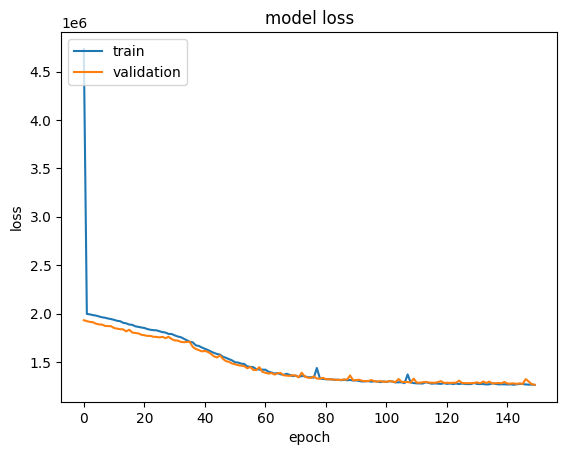

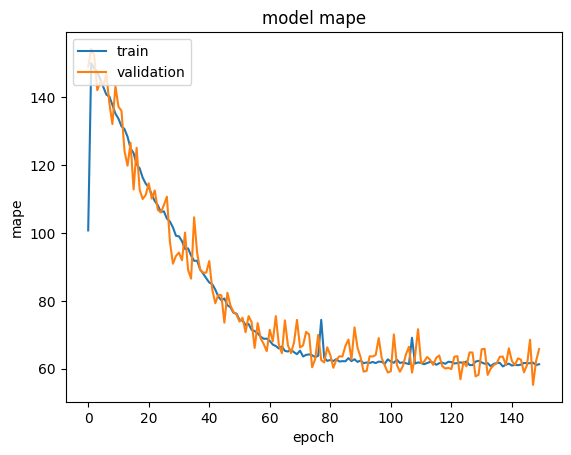

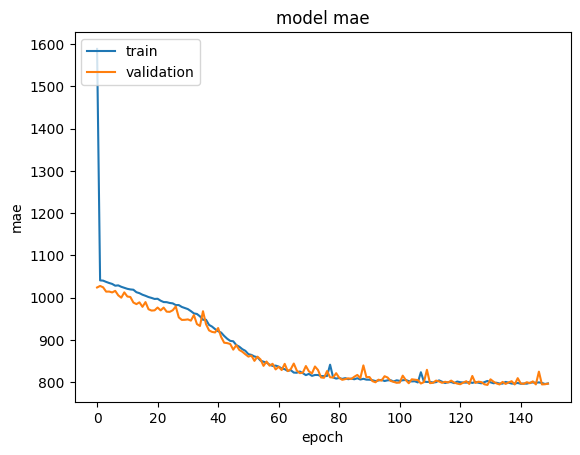

In [195]:
plots(model_history)

In [197]:
df_solution=test_data[['Item_Identifier','Outlet_Identifier']]
df_solution["Item_Outlet_Sales"]=prediction
df_solution

C:\Users\Home\AppData\Local\Temp\ipykernel_26136\4107708513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solution["Item_Outlet_Sales"]=prediction


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1761.506104
1,FDW14,OUT017,1365.181885
2,NCN55,OUT010,979.039001
3,FDQ58,OUT017,2460.002197
4,FDY38,OUT027,5034.041016
...,...,...,...
5676,FDB58,OUT046,2424.435791
5677,FDD47,OUT018,3147.625244
5678,NCO17,OUT045,1829.690796
5679,FDJ26,OUT017,3384.603027


In [198]:
df_solution.to_csv('solution.csv', index=False)